In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append('/Users/henriquelopes/Projects/cartolaAPI')
import pickle

In [3]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from data_science_utils.result_analysis.evaluation_metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from data_science_utils.result_analysis.evaluation_metrics import evaluate_model, get_average_best_team, get_best_team, get_top_players

In [4]:
TARGET = 'target'

BASIC_FEATURES = ['Pontos', 'PontosMedia', 'Preco', 'PrecoVariacao', 
                  'FS', 'PE', 'A', 'FT', 'FD', 'FF', 'G', 'I', 'PP', 
                  'RB', 'FC', 'GC', 'CA', 'CV', 'SG', 'DD', 'DP', 'GS',
                 'home_score', 'away_score', 'result', 'game_points', 'Home']

CATEGORICAL_FEATURES = ['mei', 'missing', 'ata', 'lat', 'zag', 'gol',
                        'GRE', 'SAO', 'FLA', 'COR', 'PAL', 'CFC', 'CRU',
                        'CAP', 'SAN', 'SPT', 'FLU', 'CHA', 'CAM', 'INT',
                        'FIG', 'VIT', 'BOT', 'PON', 'GOI', 'BAH', 'VAS',
                        'AVA', 'JEC', 'SCZ', 'CRI', 'AME', 'ATL-GO', 'True', 'False']

PLAYER_FEATURES = ['FS_avg_last_20', 'PE_avg_last_20', 'A_avg_last_20', 'FT_avg_last_20',
                   'FD_avg_last_20', 'FF_avg_last_20', 'G_avg_last_20', 'I_avg_last_20',
                   'PP_avg_last_20', 'RB_avg_last_20', 'FC_avg_last_20', 'GC_avg_last_20',
                   'CA_avg_last_20', 'CV_avg_last_20', 'SG_avg_last_20', 'DD_avg_last_20',
                   'DP_avg_last_20', 'GS_avg_last_20', 'Pontos_avg_last_20', 'Preco_avg_last_20',
                   'game_points_avg_last_20', 'FS_avg_last_10', 'PE_avg_last_10', 'A_avg_last_10',
                   'FT_avg_last_10', 'FD_avg_last_10', 'FF_avg_last_10', 'G_avg_last_10', 'I_avg_last_10',
                   'PP_avg_last_10', 'RB_avg_last_10', 'FC_avg_last_10', 'GC_avg_last_10', 'CA_avg_last_10',
                   'CV_avg_last_10', 'SG_avg_last_10', 'DD_avg_last_10', 'DP_avg_last_10', 'GS_avg_last_10',
                   'Pontos_avg_last_10', 'Preco_avg_last_10', 'game_points_avg_last_10', 'FS_avg_last_5', 
                   'PE_avg_last_5', 'A_avg_last_5', 'FT_avg_last_5', 'FD_avg_last_5', 'FF_avg_last_5', 
                   'G_avg_last_5', 'I_avg_last_5', 'PP_avg_last_5', 'RB_avg_last_5', 'FC_avg_last_5',
                   'GC_avg_last_5', 'CA_avg_last_5', 'CV_avg_last_5', 'SG_avg_last_5', 'DD_avg_last_5',
                   'DP_avg_last_5', 'GS_avg_last_5', 'Pontos_avg_last_5', 'Preco_avg_last_5', 
                   'game_points_avg_last_5', 'FS_avg_home_last_20', 'PE_avg_home_last_20', 'A_avg_home_last_20',
                   'FT_avg_home_last_20', 'FD_avg_home_last_20', 'FF_avg_home_last_20', 'G_avg_home_last_20',
                   'I_avg_home_last_20', 'PP_avg_home_last_20', 'RB_avg_home_last_20', 'FC_avg_home_last_20',
                   'GC_avg_home_last_20', 'CA_avg_home_last_20', 'CV_avg_home_last_20', 'SG_avg_home_last_20',
                   'DD_avg_home_last_20', 'DP_avg_home_last_20', 'GS_avg_home_last_20', 'Pontos_avg_home_last_20',
                   'Preco_avg_home_last_20', 'game_points_avg_home_last_20', 'FS_avg_home_last_10', 
                   'PE_avg_home_last_10', 'A_avg_home_last_10', 'FT_avg_home_last_10', 'FD_avg_home_last_10',
                   'FF_avg_home_last_10', 'G_avg_home_last_10', 'I_avg_home_last_10', 'PP_avg_home_last_10', 
                   'RB_avg_home_last_10', 'FC_avg_home_last_10', 'GC_avg_home_last_10', 'CA_avg_home_last_10',
                   'CV_avg_home_last_10', 'SG_avg_home_last_10', 'DD_avg_home_last_10', 'DP_avg_home_last_10',
                   'GS_avg_home_last_10', 'Pontos_avg_home_last_10', 'Preco_avg_home_last_10', 
                   'game_points_avg_home_last_10', 'FS_avg_home_last_5', 'PE_avg_home_last_5',
                   'A_avg_home_last_5', 'FT_avg_home_last_5', 'FD_avg_home_last_5', 'FF_avg_home_last_5',
                   'G_avg_home_last_5', 'I_avg_home_last_5', 'PP_avg_home_last_5', 'RB_avg_home_last_5', 
                   'FC_avg_home_last_5', 'GC_avg_home_last_5', 'CA_avg_home_last_5', 'CV_avg_home_last_5', 
                   'SG_avg_home_last_5', 'DD_avg_home_last_5', 'DP_avg_home_last_5', 'GS_avg_home_last_5',
                   'Pontos_avg_home_last_5', 'Preco_avg_home_last_5', 'game_points_avg_home_last_5',]

TEAM_FEATURES = ['FS_avg_team_home_last_20', 'PE_avg_team_home_last_20', 'A_avg_team_home_last_20',
                 'FT_avg_team_home_last_20', 'FD_avg_team_home_last_20', 'FF_avg_team_home_last_20',
                 'G_avg_team_home_last_20', 'I_avg_team_home_last_20', 'PP_avg_team_home_last_20',
                 'RB_avg_team_home_last_20', 'FC_avg_team_home_last_20', 'GC_avg_team_home_last_20',
                 'CA_avg_team_home_last_20', 'CV_avg_team_home_last_20', 'SG_avg_team_home_last_20',
                 'DD_avg_team_home_last_20', 'DP_avg_team_home_last_20', 'GS_avg_team_home_last_20',
                 'Pontos_avg_team_home_last_20', 'Preco_avg_team_home_last_20', 'game_points_avg_team_home_last_20', 
                 'FS_avg_team_home_last_10', 'PE_avg_team_home_last_10', 'A_avg_team_home_last_10',
                 'FT_avg_team_home_last_10', 'FD_avg_team_home_last_10', 'FF_avg_team_home_last_10',
                 'G_avg_team_home_last_10', 'I_avg_team_home_last_10', 'PP_avg_team_home_last_10',
                 'RB_avg_team_home_last_10', 'FC_avg_team_home_last_10', 'GC_avg_team_home_last_10', 
                 'CA_avg_team_home_last_10', 'CV_avg_team_home_last_10', 'SG_avg_team_home_last_10',
                 'DD_avg_team_home_last_10', 'DP_avg_team_home_last_10', 'GS_avg_team_home_last_10', 
                 'Pontos_avg_team_home_last_10', 'Preco_avg_team_home_last_10', 'game_points_avg_team_home_last_10',
                 'FS_avg_team_home_last_5', 'PE_avg_team_home_last_5', 'A_avg_team_home_last_5', 
                 'FT_avg_team_home_last_5', 'FD_avg_team_home_last_5', 'FF_avg_team_home_last_5',
                 'G_avg_team_home_last_5', 'I_avg_team_home_last_5', 'PP_avg_team_home_last_5',
                 'RB_avg_team_home_last_5', 'FC_avg_team_home_last_5', 'GC_avg_team_home_last_5',
                 'CA_avg_team_home_last_5', 'CV_avg_team_home_last_5', 'SG_avg_team_home_last_5',
                 'DD_avg_team_home_last_5', 'DP_avg_team_home_last_5', 'GS_avg_team_home_last_5',
                 'Pontos_avg_team_home_last_5', 'Preco_avg_team_home_last_5', 'game_points_avg_team_home_last_5']

ENEMY_FEATURES = ['FS_avg_enemy_home_last_20', 'PE_avg_enemy_home_last_20', 'A_avg_enemy_home_last_20', 
                  'FT_avg_enemy_home_last_20', 'FD_avg_enemy_home_last_20', 'FF_avg_enemy_home_last_20',
                  'G_avg_enemy_home_last_20', 'I_avg_enemy_home_last_20', 'PP_avg_enemy_home_last_20',
                  'RB_avg_enemy_home_last_20', 'FC_avg_enemy_home_last_20', 'GC_avg_enemy_home_last_20',
                  'CA_avg_enemy_home_last_20', 'CV_avg_enemy_home_last_20', 'SG_avg_enemy_home_last_20',
                  'DD_avg_enemy_home_last_20', 'DP_avg_enemy_home_last_20', 'GS_avg_enemy_home_last_20',
                  'Pontos_avg_enemy_home_last_20', 'Preco_avg_enemy_home_last_20', 
                  'game_points_avg_enemy_home_last_20', 'FS_avg_enemy_home_last_10',
                  'PE_avg_enemy_home_last_10', 'A_avg_enemy_home_last_10', 'FT_avg_enemy_home_last_10',
                  'FD_avg_enemy_home_last_10', 'FF_avg_enemy_home_last_10', 'G_avg_enemy_home_last_10',
                  'I_avg_enemy_home_last_10', 'PP_avg_enemy_home_last_10', 'RB_avg_enemy_home_last_10',
                  'FC_avg_enemy_home_last_10', 'GC_avg_enemy_home_last_10', 'CA_avg_enemy_home_last_10',
                  'CV_avg_enemy_home_last_10', 'SG_avg_enemy_home_last_10', 'DD_avg_enemy_home_last_10',
                  'DP_avg_enemy_home_last_10', 'GS_avg_enemy_home_last_10', 'Pontos_avg_enemy_home_last_10',
                  'Preco_avg_enemy_home_last_10', 'game_points_avg_enemy_home_last_10', 'FS_avg_enemy_home_last_5', 
                  'PE_avg_enemy_home_last_5', 'A_avg_enemy_home_last_5', 'FT_avg_enemy_home_last_5', 
                  'FD_avg_enemy_home_last_5', 'FF_avg_enemy_home_last_5', 'G_avg_enemy_home_last_5',
                  'I_avg_enemy_home_last_5', 'PP_avg_enemy_home_last_5', 'RB_avg_enemy_home_last_5', 
                  'FC_avg_enemy_home_last_5', 'GC_avg_enemy_home_last_5', 'CA_avg_enemy_home_last_5',
                  'CV_avg_enemy_home_last_5', 'SG_avg_enemy_home_last_5', 'DD_avg_enemy_home_last_5',
                  'DP_avg_enemy_home_last_5', 'GS_avg_enemy_home_last_5', 'Pontos_avg_enemy_home_last_5',
                  'Preco_avg_enemy_home_last_5', 'game_points_avg_enemy_home_last_5']

POSITION_FEATURES = ['FS_avg_pos_home_last_20', 'PE_avg_pos_home_last_20', 'A_avg_pos_home_last_20', 
                     'FT_avg_pos_home_last_20', 'FD_avg_pos_home_last_20', 'FF_avg_pos_home_last_20',
                     'G_avg_pos_home_last_20', 'I_avg_pos_home_last_20', 'PP_avg_pos_home_last_20',
                     'RB_avg_pos_home_last_20', 'FC_avg_pos_home_last_20', 'GC_avg_pos_home_last_20',
                     'CA_avg_pos_home_last_20', 'CV_avg_pos_home_last_20', 'SG_avg_pos_home_last_20',
                     'DD_avg_pos_home_last_20', 'DP_avg_pos_home_last_20', 'GS_avg_pos_home_last_20',
                     'Pontos_avg_pos_home_last_20', 'Preco_avg_pos_home_last_20', 'game_points_avg_pos_home_last_20',
                     'FS_avg_pos_home_last_10', 'PE_avg_pos_home_last_10', 'A_avg_pos_home_last_10', 
                     'FT_avg_pos_home_last_10', 'FD_avg_pos_home_last_10', 'FF_avg_pos_home_last_10', 
                     'G_avg_pos_home_last_10', 'I_avg_pos_home_last_10', 'PP_avg_pos_home_last_10', 
                     'RB_avg_pos_home_last_10', 'FC_avg_pos_home_last_10', 'GC_avg_pos_home_last_10', 
                     'CA_avg_pos_home_last_10', 'CV_avg_pos_home_last_10', 'SG_avg_pos_home_last_10',
                     'DD_avg_pos_home_last_10', 'DP_avg_pos_home_last_10', 'GS_avg_pos_home_last_10',
                     'Pontos_avg_pos_home_last_10', 'Preco_avg_pos_home_last_10', 'game_points_avg_pos_home_last_10', 
                     'FS_avg_pos_home_last_5', 'PE_avg_pos_home_last_5', 'A_avg_pos_home_last_5', 
                     'FT_avg_pos_home_last_5', 'FD_avg_pos_home_last_5', 'FF_avg_pos_home_last_5',
                     'G_avg_pos_home_last_5', 'I_avg_pos_home_last_5', 'PP_avg_pos_home_last_5', 
                     'RB_avg_pos_home_last_5', 'FC_avg_pos_home_last_5', 'GC_avg_pos_home_last_5',
                     'CA_avg_pos_home_last_5', 'CV_avg_pos_home_last_5', 'SG_avg_pos_home_last_5',
                     'DD_avg_pos_home_last_5', 'DP_avg_pos_home_last_5', 'GS_avg_pos_home_last_5', 
                     'Pontos_avg_pos_home_last_5', 'Preco_avg_pos_home_last_5', 'game_points_avg_pos_home_last_5']
FEATURES = BASIC_FEATURES + PLAYER_FEATURES + TEAM_FEATURES + POSITION_FEATURES + CATEGORICAL_FEATURES
XGB_NUM_ESTIMATORS = 3000
XGB_LEARNING_RATE = 0.01

GRID_XGB_EXTRA_PARAMS = {"max_depth": [5,6,7], "subsample": [0.6, 0.7, 0.8] , "colsample_bytree": [0.6, 0.7, 0.8],
                    "colsample_by_level": [0.6, 0.7, 0.8], "seed": 43}


XGB_EXTRA_PARAMS = {"max_depth": 7, "subsample": 0.7 , "colsample_bytree": 0.5,
                    "colsample_by_level": 0.5, "seed": 43}

In [5]:
team_dict = {
'265':'BAH',
'288':'CRI',
'267':'VAS',
'290':'GOI',
'314':'AVA',
'317':'JEC',
'262':'FLA',
'263':'BOT',
'264':'COR',
'266':'FLU',
'275':'PAL',
'276':'SAO',
'277':'SAN',
'282':'CAM',
'283':'CRU',
'284':'GRE',
'285':'INT',
'287':'VIT',
'292':'SPT',
'293':'CAP',
'294':'CFC',
'303':'PON',
'315':'CHA',
'316':'FIG',
'327':'AME',
'344':'SCZ',
'373':'ATL-GO'
}

In [6]:
df = pd.read_csv('../db/preprocessed_final_df_2018-05-21.csv')

In [7]:
def read_pkl(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

In [8]:
knn = read_pkl('../model_pkls/knn.pkl')
xgb = read_pkl('../model_pkls/xgb.pkl')
lin_reg = read_pkl('../model_pkls/lin_reg.pkl')

/Users/henriquelopes/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator KNeighborsRegressor from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/henriquelopes/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearRegression from version 0.19.1 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
df_train = df.loc[(~((df.ano == 2017) & (df.Rodada > 15)))]
df_test = df.loc[(df.ano == 2017) & (df.Rodada > 15)]

In [10]:
X_test = df_test[FEATURES] 

In [11]:
knn_predict = knn(X_test)
xgb_predict = xgb(X_test)
lin_reg_predict = lin_reg(X_test)

In [12]:
y_test = df_test[TARGET].values

In [13]:
df_predicted = df_test.assign(knn_predict = knn_predict,
         xgb_predict = xgb_predict,
         lin_reg_predict = lin_reg_predict)

In [14]:
df_predicted[[TARGET, 'knn_predict', 'xgb_predict', 'lin_reg_predict']]

,target,knn_predict,xgb_predict,lin_reg_predict
48,5.9,2.425747,2.887423,2.944946
101,0.0,2.329701,1.870223,2.238037
191,5.0,2.062683,2.682091,2.048340
225,0.2,2.341056,1.780412,1.968872
226,9.4,2.746255,1.941839,1.998169
295,-0.4,1.555658,1.588925,1.746582
296,5.9,2.000546,1.991379,1.793457
297,1.4,2.432353,2.435561,2.158936
344,7.2,3.264051,3.259238,3.355469
353,0.9,2.621575,3.022711,2.048706


In [43]:
def pointsByBand(df, target, predictionCol):
    df[predictionCol + '_band'] = (df[predictionCol] / 0.5).astype('int64')
    grouped_df = df.groupby(predictionCol + '_band').agg({target: "mean"}).reset_index()
    plt.plot(grouped_df[predictionCol + '_band'], grouped_df.target)
    plt.show()

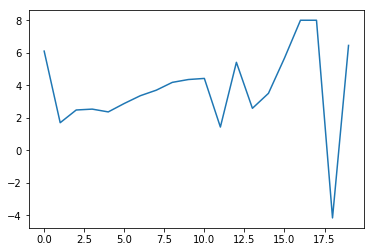

In [44]:
pointsByBand(df_predicted, 'target', 'xgb_predict')

In [63]:
def plothist(df, predictionCol, target, title='oi'):
    plt.hist(df[predictionCol], bins=20, alpha=0.5, label='previsão', normed=True, color='red')
    plt.hist(df[target], bins=20, alpha=0.5, label='esperado',  normed=True, color='green')
    plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

/Users/henriquelopes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


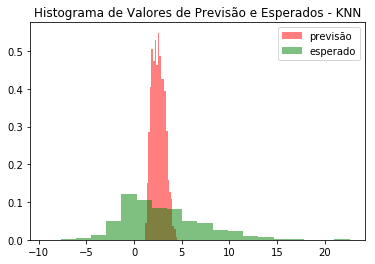

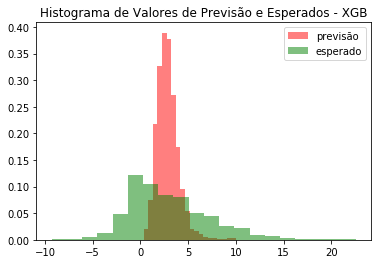

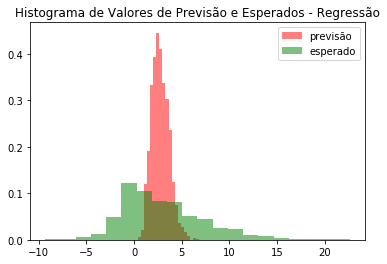

In [64]:
plothist(df_predicted, 'knn_predict', 'target', title='Histograma de Valores de Previsão e Esperados - KNN')
plothist(df_predicted, 'xgb_predict', 'target', title='Histograma de Valores de Previsão e Esperados - XGB')
plothist(df_predicted, 'lin_reg_predict', 'target', title='Histograma de Valores de Previsão e Esperados - Regressão')

In [16]:
knn_eval = evaluate_model(df_predicted, 'target', 'knn_predict')
xgb_eval = evaluate_model(df_predicted, 'target', 'xgb_predict')
lin_reg_eval = evaluate_model(df_predicted, 'target', 'lin_reg_predict')

In [17]:
names = pd.DataFrame(["knn", "xgb", "linear"], columns=["model_name"])

In [18]:
def compare_models(metric_name):
    res = pd.concat([knn_eval[metric_name],
                      xgb_eval[metric_name],
                     lin_reg_eval[metric_name]], axis=0)
    return res.assign(model_name=["knn", "xgb", "linear"]).set_index("model_name")

In [30]:
compare_models("top_players")[['pred_avg', 'pred_dev', 'desired_avg', 'desired_dev', 'mean_abs_error', 'root_mean_sqrt_error', 'r2_score']]

,pred_avg,pred_dev,desired_avg,desired_dev,mean_abs_error,root_mean_sqrt_error,r2_score
model_name,,,,,,,
knn,2.795606,0.701793,12.982,2.690107,10.186394,10.585782,-14.484843
xgb,3.231616,1.403566,12.982,2.690107,9.750384,10.268055,-13.569252
linear,3.107444,0.999956,12.982,2.690107,9.874556,10.294106,-13.643274


In [31]:
compare_models("top_players_predicted")[['pred_avg', 'pred_dev', 'desired_avg', 'desired_dev', 'mean_abs_error', 'root_mean_sqrt_error', 'r2_score']]

,pred_avg,pred_dev,desired_avg,desired_dev,mean_abs_error,root_mean_sqrt_error,r2_score
model_name,,,,,,,
knn,3.890093,0.199547,4.648,4.851896,4.105015,4.905371,-0.022164
xgb,5.720151,1.190270,4.112,5.222304,4.633185,5.733260,-0.205255
linear,4.752859,0.518814,4.290,5.143180,4.030736,5.100733,0.016438


In [32]:
compare_models("without_outliers")[['pred_avg', 'pred_dev', 'desired_avg', 'desired_dev', 'mean_abs_error', 'root_mean_sqrt_error', 'r2_score']]

,pred_avg,pred_dev,desired_avg,desired_dev,mean_abs_error,root_mean_sqrt_error,r2_score
model_name,,,,,,,
knn,2.555834,0.678103,3.06876,4.130302,3.133962,4.111173,0.009241
xgb,2.888036,1.177918,3.06876,4.130302,3.194283,4.171412,-0.020006
linear,2.769738,0.922541,3.06876,4.130302,3.150604,4.114902,0.007443


In [39]:
compare_models("best_team_avgs")[['pred_avg', 'pred_dev', 'desired_avg', 
                                  'desired_dev', 'mean_abs_error',
                                  'root_mean_sqrt_error', 'r2_score']]

,pred_avg,pred_dev,desired_avg,desired_dev,mean_abs_error,root_mean_sqrt_error,r2_score
model_name,,,,,,,
knn,2.672245,0.418508,12.880357,1.710741,10.208112,10.414369,-92.032644
xgb,2.975223,0.615070,12.880357,1.710741,9.905134,10.106724,-85.569138
linear,2.868851,0.404830,12.880357,1.710741,10.011506,10.208875,-87.625019


In [34]:
compare_models("best_team_avgs_predicted")[['pred_avg', 'pred_dev', 'desired_avg', 'desired_dev', 'mean_abs_error', 'root_mean_sqrt_error', 'r2_score']]

,pred_avg,pred_dev,desired_avg,desired_dev,mean_abs_error,root_mean_sqrt_error,r2_score
model_name,,,,,,,
knn,3.669477,0.140966,4.293452,2.332469,3.425459,3.838925,-48.768815
xgb,4.829164,0.316827,4.461905,3.167095,3.883526,4.353982,-11.432090
linear,4.178988,0.207392,3.614286,2.823056,3.658717,4.078679,-34.845903


In [35]:
compare_models("average_metrics")[['pred_avg', 'pred_dev', 'desired_avg', 'desired_dev', 'mean_abs_error', 'root_mean_sqrt_error', 'r2_score']]

,pred_avg,pred_dev,desired_avg,desired_dev,mean_abs_error,root_mean_sqrt_error,r2_score
model_name,,,,,,,
knn,2.552738,0.662741,3.008456,4.205884,3.198433,4.181339,0.011638
xgb,2.875175,1.149713,3.008456,4.205884,3.244436,4.228077,-0.010581
linear,2.753454,0.909043,3.008456,4.205884,3.210078,4.183414,0.010656
